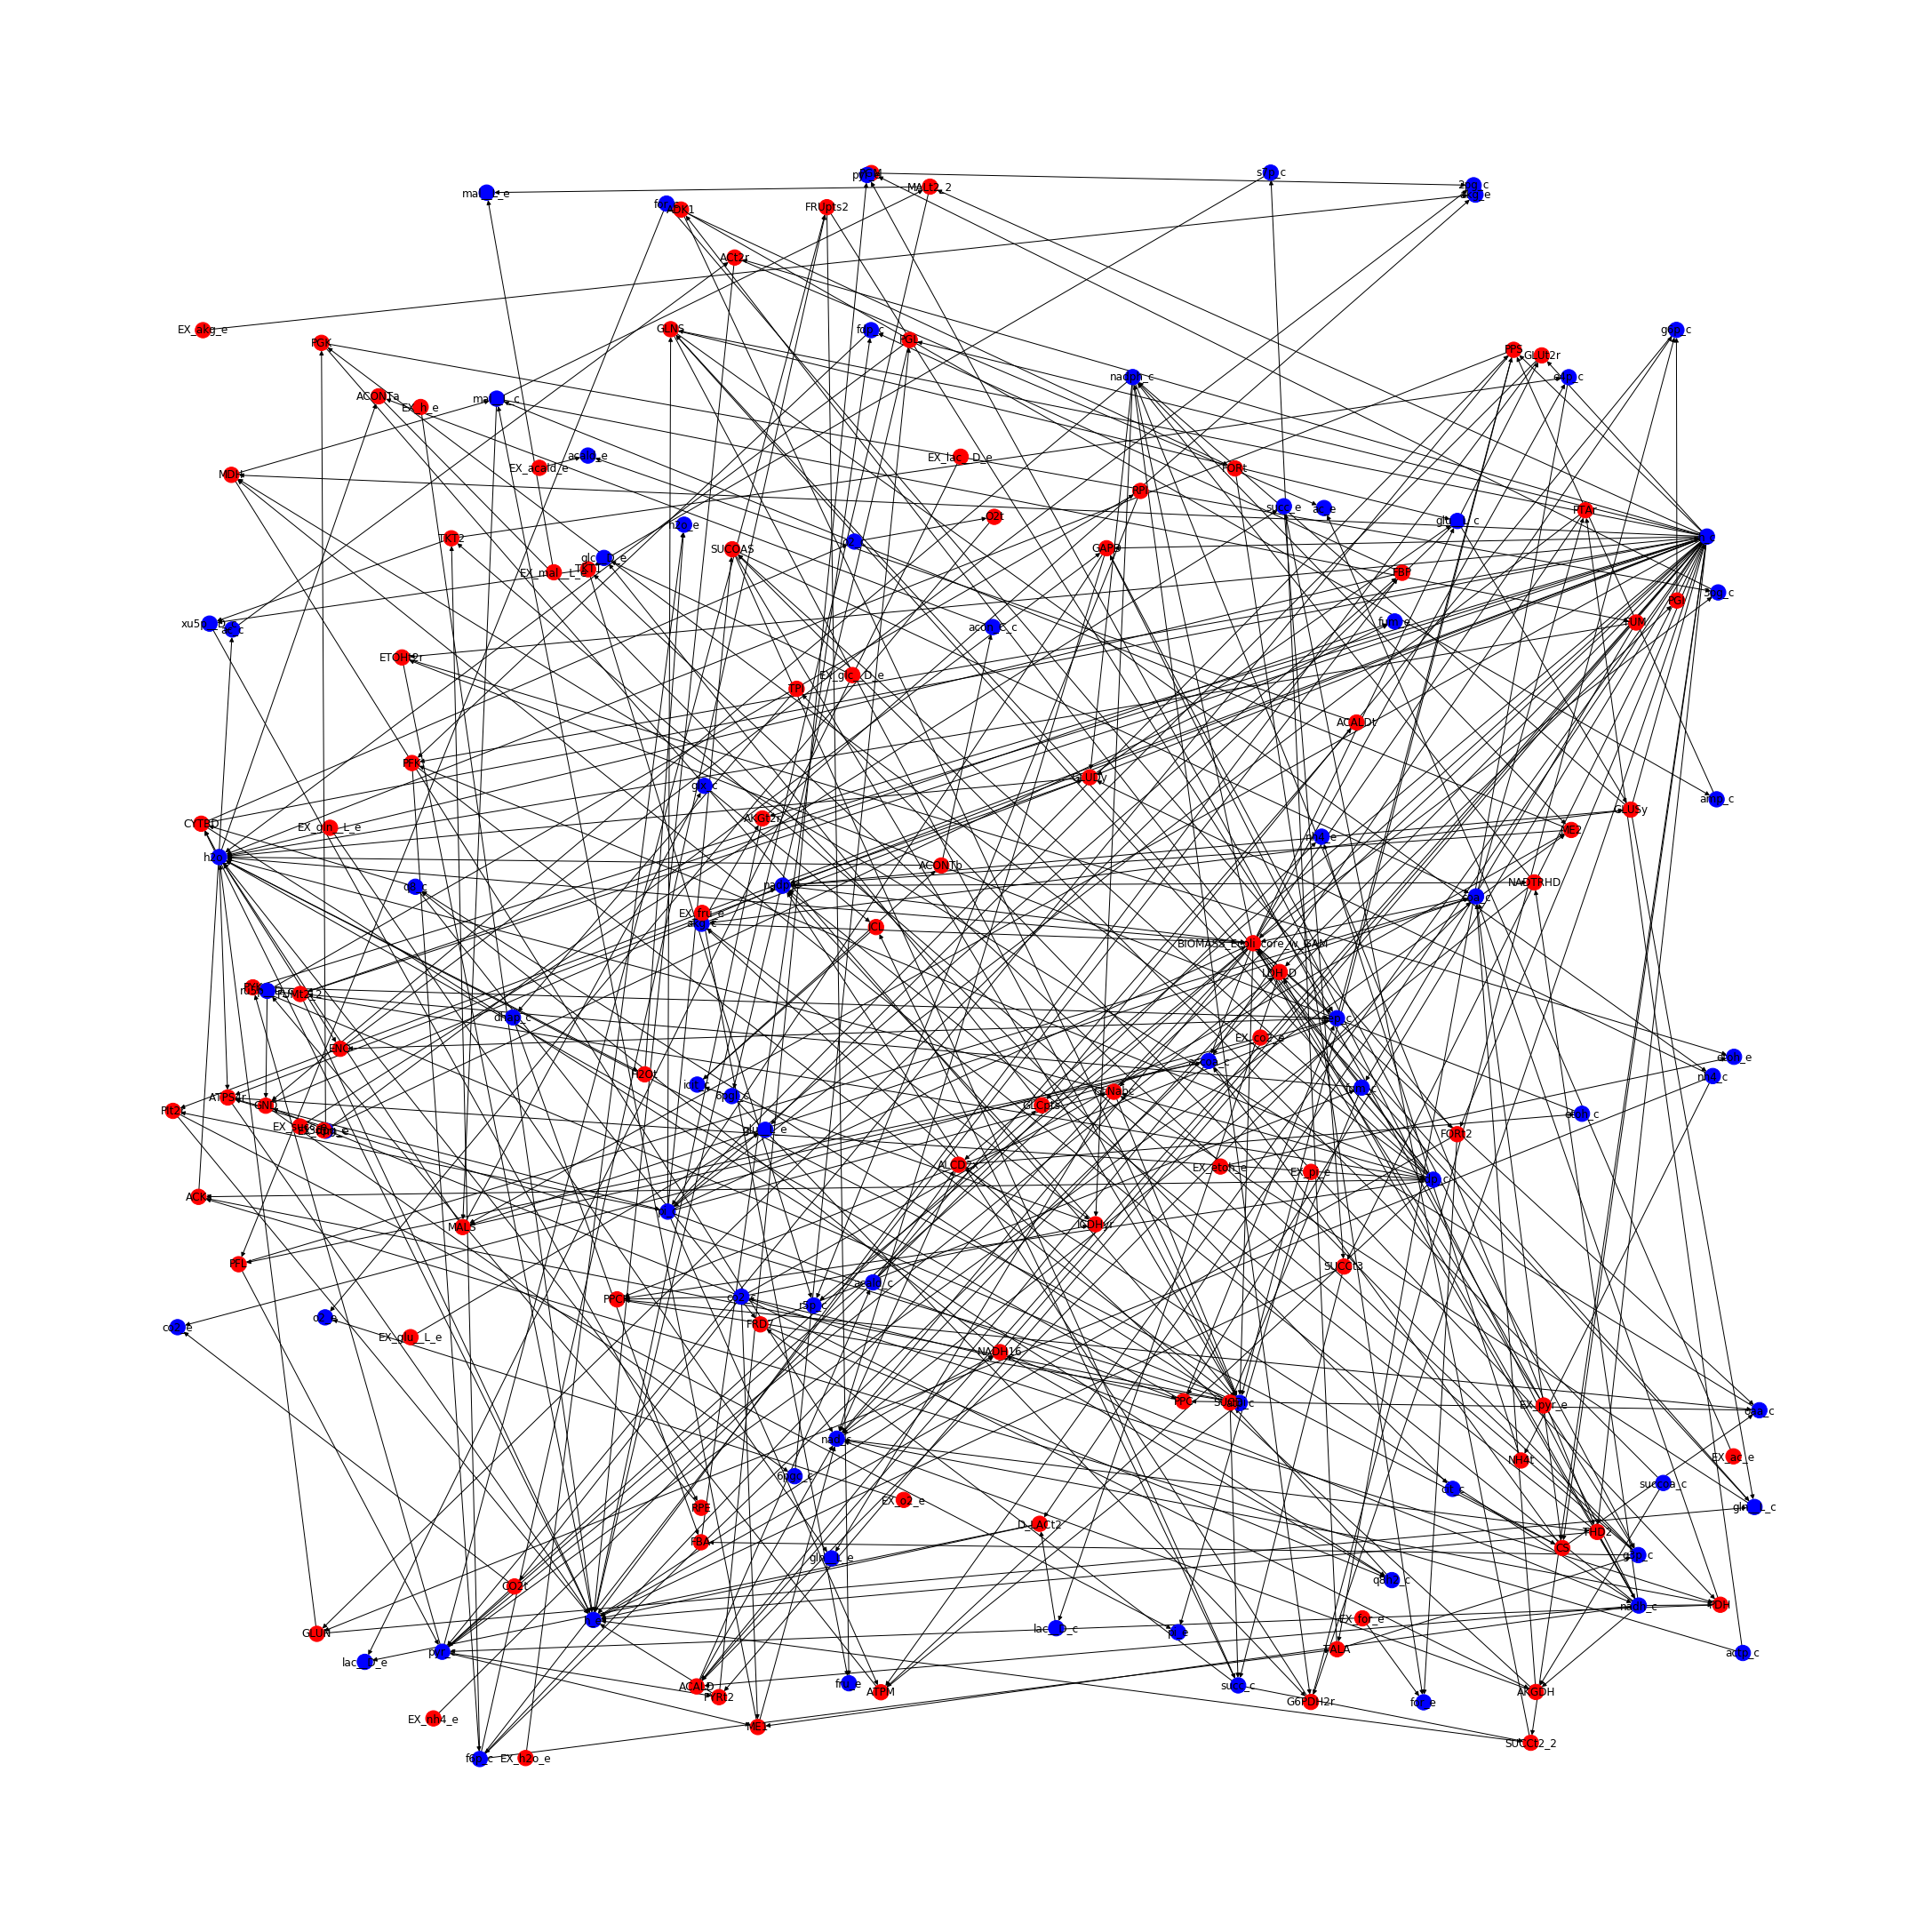

[['fum_e', 'GND', 'mal__L_c', 'ACt2r', 'acon_C_c', 'BIOMASS_Ecoli_core_w_GAM', 'q8h2_c', 'ac_e', 'SUCOAS', 'LDH_D', 'PDH', 'ICL', 'o2_c', 's7p_c', 'nh4_c', 'GAPD', 'MALt2_2', 'PGI', 'NADH16', 'FRUpts2', 'for_e', 'THD2', 'etoh_e', 'acald_c', 'CO2t', 'ATPM', 'pyr_c', 'atp_c', 'H2Ot', 'glu__L_c', 'accoa_c', 'coa_c', 'mal__L_e', 'PGK', 'pep_c', 'FUMt2_2', 'amp_c', 'D_LACt2', 'nh4_e', 'pi_e', 'PPS', 'ACONTa', 'ADK1', 'GLNabc', 'glc__D_e', 'MALS', 'nadph_c', 'q8_c', 'ME2', 'xu5p__D_c', 'AKGt2r', 'PYRt2', 'FBP', 'co2_c', 'FORt2', '6pgl_c', 'PGM', 'RPE', 'RPI', 'ATPS4r', 'ACALDt', 'ACONTb', 'gln__L_e', '3pg_c', 'nadh_c', 'g6p_c', 'nadp_c', 'succ_e', 'fum_c', 'h_e', 'CS', 'lac__D_e', 'ICDHyr', 'ACALD', 'NH4t', 'MDH', 'GLUt2r', 'o2_e', 'ETOHt2r', 'dhap_c', 'FRD7', 'lac__D_c', 'h2o_e', 'PPCK', 'ac_c', 'oaa_c', 'PFL', 'g3p_c', 'AKGDH', 'gln__L_c', 'PPC', 'adp_c', 'glu__L_e', 'FBA', 'GLUN', 'TKT2', 'O2t', 'TKT1', 'PFK', 'GLUSy', 'GLNS', 'r5p_c', 'cit_c', 'etoh_c', 'co2_e', 'G6PDH2r', 'SUCDi', 'PTAr

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import json

class Stack():
    def __init__(self, stack):
        self._list = stack
    def push(self, v):
        self._list.append(v)
    def pop(self):
        return self._list.pop()
    def isEmpty(self):
        return len(self._list) == 0
    def __len__(self):
        return len(self._list)


def DFS_util(node, Graph, visited, cycles):
    l = []
    stack = Stack([])
    stack.push(node)
    while not stack.isEmpty():
        s = stack.pop()
        visited[s] = True
        l.append(s)
        for i in list(Graph.successors(s)):
            if not visited[i]:
                stack.push(i)
    if len(l) <= 2:
        l.clear()
    else:
        cycles.append(list(set(l)))

def construct_metabolic_graph(name_of_json_file):
    
    with open(name_of_json_file) as file:
        file_to_parse = json.load(file)
    digraph = nx.DiGraph()
    products = []
    reactants = []
    for reaction in file_to_parse['reactions']:
        digraph.add_nodes_from([(reaction['id'], {'color': 'red'})])
        d = reaction['metabolites']
        for i in d.keys():
            if d[i] < 0:
                products.append(i)
                digraph.add_nodes_from([(i, {"color":"blue"})])
                digraph.add_edge(reaction['id'], i)
            else:
                reactants.append(i)
                digraph.add_nodes_from([(i, {"color":"blue"})])
                digraph.add_edge(i, reaction['id'])
    colored_dict = nx.get_node_attributes(digraph, 'color')
    default_color = 'blue'
    color_seq = [colored_dict.get(node, default_color) for node in digraph.nodes()]
    plt.figure(figsize=(30,30))
    nx.draw_random(digraph, with_labels = True, node_color = color_seq)
    plt.show()
    return digraph

def Find_Cycles_In_Metabolic_Graph(Graph):
    node_list = list(Graph)
    visited = {}
    for j in node_list:
        visited[j] = False
    cycles = []
    for i in node_list:
        if not visited[i]:
            DFS_util(i, Graph, visited, cycles)
    return cycles
G = construct_metabolic_graph('e_coli_core.json')
cycles = Find_Cycles_In_Metabolic_Graph(G)
print(cycles)